# AI2619 Programming Homework 3

This homework is mainly about device-side mechanisms and inner workings of DFT.

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import concurrent.futures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Generating random signal arrays

Now we generate signal arrays with different lengths.

In [13]:
# Generate random array with 2^12 in length - maximum hardware
signal_random_2 = np.random.rand(2**2)
signal_random_4 = np.random.rand(2**4)
signal_random_6 = np.random.rand(2**6)
signal_random_8 = np.random.rand(2**8)
signal_random_10 = np.random.rand(2**10)
signal_random_12 = np.random.rand(2**12)
signal_random_14 = np.random.rand(2**14)
signal_random_16 = np.random.rand(2**16)
signal_random_18 = np.random.rand(2**18)
signal_random_20 = np.random.rand(2**20)
signals_short = [signal_random_2, signal_random_4, signal_random_6, signal_random_8, signal_random_10]
signals_long = [signal_random_2, signal_random_4, signal_random_6, signal_random_8, signal_random_10, signal_random_12, signal_random_14, signal_random_16, signal_random_18]

Before diving in, I'd like to create a function that generates the DFT output by `numpy`.

In [11]:
def dft_0(sample):
    '''
    Discrete Fourier Transform using NumPy

    Parameters:
        sample: 1D array of real numbers

    Returns:
        The shifted DFT output
    '''
    N = len(sample)
    dft_output = np.fft.fft(sample)
    dft_output = dft_output[int(N/2):] + dft_output[:int(N/2)]
    return dft_output

## Task 1: DFT with `for` loop

I've already implemented the DFT with `for` loop in [Programming Assignment #2](https://github.com/Gennadiyev/AI2619-HW/blob/main/programming-2/main.ipynb).

In [20]:
def dft_1(sample):
    '''
    Discrete Fourier Transform using `for` loop.

    Parameters:
        sample: 1D array of real numbers

    Returns:
        The shifted DFT output
    '''
    N = len(sample)
    dft_output = []
    # Perform DFT
    for k in range(N):
        sum = 0
        for n in range(N):
            sum += sample[n] * math.cos(2 * math.pi * n * k / N)
        dft_output.append(sum)
    # Shift on frequency domain
    dft_output = np.array(dft_output[int(N/2):] + dft_output[:int(N/2)])
    return dft_output

# This function is unable to run in Jupyter Notebook because interactive sessions do not support multiprocessing.
# Please refer to task_1.py and use `python task_1.py` to run the DFT with multi-processing.
def dft_1_opt(sample):
    '''
    Discrete Fourier Transform using `for` loop, optimized with multi-processing.

    Parameters:
        sample: 1D array of real numbers

    Returns:
        The shifted DFT output
    '''
    N = len(sample)
    # We need to use multi-processing to accelerate the process
    import multiprocessing as mp
    # Create a pool of processes
    print("Number of cores: ", mp.cpu_count())
    dft_output = [None for i in range(N)]
    # Define DFT task
    def dft_k(sample, k, N):
        return sum(sample[n] * math.cos(2 * math.pi * n * k / N) for n in range(N))
    # Perform DFT
    print("Performing DFT...")
    with concurrent.futures.ProcessPoolExecutor(max_workers=4) as executor:
        ret = {executor.submit(dft_k, sample, k, N): k for k in range(N)}
        for future in concurrent.futures.as_completed(ret):
            k = ret[future]
            dft_output[k] = future.result()
            print("k = ", k)
            print("dft_output[k] = ", dft_output[k])
    print("DFT done")
    # Shift on frequency domain
    dft_output = np.array(dft_output[int(N/2):] + dft_output[:int(N/2)])
    return dft_output

Because several limitations exist in Jupyter Notebook (interactive sessions do not support *m*ulti-threading*), this part of the code is tested in `task_1.py`. Here are the results:

```
DFT_1 Implementation (for loop)
>>> Signal length: 4
>   Starting DFT at  16:18:12
>   Finished DFT at  16:18:12
>   Time elapsed: 0.0009984970092773438 seconds     
>   Started 1000-round test...
>   Finished 1000-round test, using 0.006993532180786133 seconds
>>> Signal length: 16
>   Starting DFT at  16:18:12
>   Finished DFT at  16:18:12
>   Time elapsed: 0.0 seconds
>   Started 1000-round test...
>   Finished 1000-round test, using 0.08599448204040527 seconds
>>> Signal length: 64
>   Starting DFT at  10:25:12
>   Finished DFT at  10:25:12
>   Time elapsed: 0.0019943714141845703 seconds
>   Started 1000-round test...
>   Finished 1000-round test, using 1.158879041671753 seconds
>>> Signal length: 256
>   Starting DFT at  10:25:13
>   Finished DFT at  10:25:13
>   Time elapsed: 0.01999521255493164 seconds
>   Started 1000-round test...
>   Finished 1000-round test, using 17.742910385131836 seconds
>>> Signal length: 1024
>   Starting DFT at  10:25:31
>   Finished DFT at  10:25:31
>   Time elapsed: 0.28799986839294434 seconds
>   Started 100-round test...
>   Finished 100-round test, using 29.181013345718384 seconds
>>> Signal length: 4096
>   Starting DFT at  10:26:00
>   Finished DFT at  10:26:05
>   Time elapsed: 4.641534090042114 seconds
>>> Signal length: 16384
>   Starting DFT at  10:28:17
>   Finished DFT at  10:29:29
>   Time elapsed: 71.96527910232544 seconds
>>> Signal length: 65536
>   Starting DFT at  16:20:25
>   Finished DFT at  16:40:44
>   Time elapsed: 1219.0646941661835 seconds
>>> Signal length: 262144
>   Starting DFT at  16:40:44
>   Finished DFT at  04:26:27
>   Time elapsed: 42343.20760321617 seconds
```

```
DFT_1 Implementation (for loop parellel)
>>> Signal length: 4
>   Starting DFT at  04:26:27
>   Finished DFT at  04:26:29
>   Time elapsed: 1.4602656364440918 seconds
>>> Signal length: 16
>   Starting DFT at  04:26:29
>   Finished DFT at  04:26:29
>   Time elapsed: 0.6489996910095215 seconds
>   Started 100-round test...
>   Finished 100-round test, using 53.03204298019409 seconds
>>> Signal length: 64
>   Starting DFT at  04:27:22
>   Finished DFT at  04:27:23
>   Time elapsed: 0.47299885749816895 seconds
>   Started 100-round test...
>   Finished 100-round test, using 46.54070997238159 seconds
>>> Signal length: 256
>   Starting DFT at  04:28:09
>   Finished DFT at  04:28:10
>   Time elapsed: 0.3280000686645508 seconds
>   Started 100-round test...
>   Finished 100-round test, using 46.44240760803223 seconds
>>> Signal length: 1024
>   Starting DFT at  04:28:56
>   Finished DFT at  04:28:57
>   Time elapsed: 0.5873832702636719 seconds
>   Started 100-round test...
>   Finished 100-round test, using 58.53805708885193 seconds
>>> Signal length: 4096
>   Starting DFT at  04:29:55
>   Finished DFT at  04:29:57
>   Time elapsed: 1.351588249206543 seconds
>>> Signal length: 16384
>   Starting DFT at  04:29:57
>   Finished DFT at  04:30:13
>   Time elapsed: 16.528849363327026 seconds
>>> Signal length: 65536
>   Starting DFT at  04:30:13
>   Finished DFT at  04:36:41
>   Time elapsed: 387.9387946128845 seconds
>>> Signal length: 262144
>   Starting DFT at  04:36:41
>   Finished DFT at  06:22:53
>   Time elapsed: 6371.492014169693 seconds
```

I will show the comparison of all implementations later.

## Task 2

This task is mainly about performing DFT using matrix manipulation. Here we implement the process with `numpy`.

> Here is some math to understand the process:
> 
> If the input discrete signal $x$ has length $N=|x|$, we are performing an **$N$-point DFT**:
> $$x[n] \xrightarrow{\mathscr{F}} X[\omega]$$
> 
> The computation is equivalent to the following matrix multiplication:
> $$\displaystyle X=Wx$$
> where:
> $$W = \frac{1}{\sqrt{N}} \begin{bmatrix}
1&1&1&1&\cdots &1 \\
1&\omega&\omega^2&\omega^3&\cdots&\omega^{N-1} \\
1&\omega^2&\omega^4&\omega^6&\cdots&\omega^{2(N-1)}\\ 1&\omega^3&\omega^6&\omega^9&\cdots&\omega^{3(N-1)}\\
\vdots&\vdots&\vdots&\vdots&\ddots&\vdots\\
1&\omega^{N-1}&\omega^{2(N-1)}&\omega^{3(N-1)}&\cdots&\omega^{(N-1)(N-1)}\\
\end{bmatrix}$$
> where $\displaystyle \omega =e^{-{\large\frac {\mathrm{j}2\pi}{N}}}$

And here is the implementation of the above process.

In [10]:
def dft_2(sample):
    '''
    Perform DFT with matrix manipulations.

    Parameters:
        sample: 1D array of real numbers

    Returns:
        The shifted DFT output
    '''
    N = len(sample)
    # Perform DFT with matrix manipulations
    x = np.asarray(sample, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N) # The matrix used to compute DFT
    return np.fft.fftshift(np.dot(M, x))

In [34]:
# Test dft_2
def dft_2_test():
    print("DFT_2 Implementation (matrix multiplication)")
    dft_2_output = []
    time_elapsed = []
    for signal in signals_short:
        start = time.time()
        print(">>> Signal length:", len(signal))
        print(">   Starting DFT at ", time.strftime("%H:%M:%S", time.localtime()))
        dft_2_output.append(dft_2(signal))
        print(">   Finished DFT at ", time.strftime("%H:%M:%S", time.localtime()))
        end = time.time()
        # If time is shorter then 1 second, perform 100 times to see time used
        print(">   Time elapsed: " + str(end - start) + " seconds")
        if end - start < 0.1:
            print(">   Started 1000-round test...")
            start_1000 = time.time()
            for i in range(1000):
                dft_2(signal)
            end_1000 = time.time()
            print(">   Finished 1000-round test, using " + str(end_1000 - start_1000) + " seconds")
            time_elapsed.append((end_1000 - start_1000)/1000)
        elif end - start < 1:
            print(">   Started 100-round test...")
            start_100 = time.time()
            for i in range(100):
                dft_2(signal)
            end_100 = time.time()
            print(">   Finished 100-round test, using " + str(end_100 - start_100) + " seconds")
            time_elapsed.append((end_100 - start_100)/100)
        else:
            time_elapsed.append(end - start)
    return dft_2_output, time_elapsed

dft_2_output, time_elapsed = dft_2_test()

DFT_2 Implementation (matrix multiplication)
>>> Signal length: 4
>   Starting DFT at  14:10:47
>   Finished DFT at  14:10:47
>   Time elapsed: 0.0 seconds
>   Started 1000-round test...
>   Finished 1000-round test, using 0.019989728927612305 seconds
>>> Signal length: 16
>   Starting DFT at  14:10:47
>   Finished DFT at  14:10:47
>   Time elapsed: 0.0 seconds
>   Started 1000-round test...
>   Finished 1000-round test, using 0.029007911682128906 seconds
>>> Signal length: 64
>   Starting DFT at  14:10:47
>   Finished DFT at  14:10:47
>   Time elapsed: 0.0019996166229248047 seconds
>   Started 1000-round test...
>   Finished 1000-round test, using 0.44599270820617676 seconds
>>> Signal length: 256
>   Starting DFT at  14:10:47
>   Finished DFT at  14:10:47
>   Time elapsed: 0.004010200500488281 seconds
>   Started 1000-round test...
>   Finished 1000-round test, using 4.722993612289429 seconds
>>> Signal length: 1024
>   Starting DFT at  14:10:52
>   Finished DFT at  14:10:52
>   Time

I cannot perform this test on a larger scale because the memory used to store the DFT matrix can easily exceed my maximum available memory. 

## Task 3

Originally we need to use the `fft` function in MATLAB to perform the DFT. In this case, we will use `np.fft` directly. See implementation in the first part of the notebook, where I used it as a reference answer to the other parts of the assignment.

In [14]:
def dft_3_test():
    print("DFT_3 Implementation (matrix multiplication)")
    dft_3_output = []
    time_elapsed = []
    for signal in signals_long:
        start = time.time()
        print(">>> Signal length:", len(signal))
        print(">   Starting DFT at ", time.strftime("%H:%M:%S", time.localtime()))
        dft_3_output.append(dft_0(signal))
        print(">   Finished DFT at ", time.strftime("%H:%M:%S", time.localtime()))
        end = time.time()
        # If time is shorter then 1 second, perform 100 times to see time used
        print(">   Time elapsed: " + str(end - start) + " seconds")
        if end - start < 0.1:
            print(">   Started 1000-round test...")
            start_1000 = time.time()
            for i in range(1000):
                dft_0(signal)
            end_1000 = time.time()
            print(">   Finished 1000-round test, using " + str(end_1000 - start_1000) + " seconds")
            time_elapsed.append((end_1000 - start_1000)/1000)
        elif end - start < 1:
            print(">   Started 100-round test...")
            start_100 = time.time()
            for i in range(100):
                dft_0(signal)
            end_100 = time.time()
            print(">   Finished 100-round test, using " + str(end_100 - start_100) + " seconds")
            time_elapsed.append((end_100 - start_100)/100)
        else:
            time_elapsed.append(end - start)
    return dft_3_output, time_elapsed

dft_3_output, time_elapsed = dft_3_test()

DFT_3 Implementation (matrix multiplication)
>>> Signal length: 4
>   Starting DFT at  15:48:57
>   Finished DFT at  15:48:57
>   Time elapsed: 0.0 seconds
>   Started 1000-round test...
>   Finished 1000-round test, using 0.003996610641479492 seconds
>>> Signal length: 16
>   Starting DFT at  15:48:57
>   Finished DFT at  15:48:57
>   Time elapsed: 0.0 seconds
>   Started 1000-round test...
>   Finished 1000-round test, using 0.0050029754638671875 seconds
>>> Signal length: 64
>   Starting DFT at  15:48:57
>   Finished DFT at  15:48:57
>   Time elapsed: 0.0 seconds
>   Started 1000-round test...
>   Finished 1000-round test, using 0.004996538162231445 seconds
>>> Signal length: 256
>   Starting DFT at  15:48:57
>   Finished DFT at  15:48:57
>   Time elapsed: 0.0 seconds
>   Started 1000-round test...
>   Finished 1000-round test, using 0.005002021789550781 seconds
>>> Signal length: 1024
>   Starting DFT at  15:48:57
>   Finished DFT at  15:48:57
>   Time elapsed: 0.000999212265014648

## Task 4

In this task we are asked to use `gpuArray` to perform the DFT on GPU. Here we use `CUFFT`, a more basic library for GPU computing. We use `CuPy` to perform related operations. The related tutorials and documentations are found [here](https://docs.cupy.dev/en/stable/user_guide/fft.html).

In [4]:
import cupy as cp

Now we use the built in function `cp.fft.fft` to perform the DFT:

In [5]:
import cupyx.scipy.fft as cufft

def dft_4(sample):
    '''
    Perform DFT with CuPy.

    Parameters:
        sample: 1D array of real numbers

    Returns:
        The shifted DFT output
    '''
    sample = cp.asarray(sample, dtype=float)
    dft_output = cufft.fft(sample)
    return cufft.fftshift(dft_output)

We also make a test function for this:

In [15]:
# Test dft_4
def dft_4_test():
    print("DFT_4 Implementation (GPU Accelerated)")
    dft_4_output = []
    time_elapsed = []
    for signal in signals_long:
        start = time.time()
        print(">>> Signal length:", len(signal))
        print(">   Starting DFT at ", time.strftime("%H:%M:%S", time.localtime()))
        dft_4_output.append(dft_4(signal))
        print(">   Finished DFT at ", time.strftime("%H:%M:%S", time.localtime()))
        end = time.time()
        # If time is shorter then 1 second, perform 100 times to see time used
        print(">   Time elapsed: " + str(end - start) + " seconds")
        if end - start < 0.1:
            print(">   Started 1000-round test...")
            start_1000 = time.time()
            for i in range(1000):
                dft_4(signal)
            end_1000 = time.time()
            print(">   Finished 1000-round test, using " + str(end_1000 - start_1000) + " seconds")
            time_elapsed.append((end_1000 - start_1000)/1000)
        elif end - start < 1:
            print(">   Started 100-round test...")
            start_100 = time.time()
            for i in range(100):
                dft_4(signal)
            end_100 = time.time()
            print(">   Finished 100-round test, using " + str(end_100 - start_100) + " seconds")
            time_elapsed.append((end_100 - start_100)/100)
        else:
            time_elapsed.append(end - start)
    return dft_4_output, time_elapsed

dft_4_output, time_elapsed = dft_4_test()

DFT_4 Implementation (GPU Accelerated)
>>> Signal length: 4
>   Starting DFT at  15:49:36
>   Finished DFT at  15:49:36
>   Time elapsed: 0.0019431114196777344 seconds
>   Started 1000-round test...
>   Finished 1000-round test, using 0.12601804733276367 seconds
>>> Signal length: 16
>   Starting DFT at  15:49:36
>   Finished DFT at  15:49:36
>   Time elapsed: 0.001979827880859375 seconds
>   Started 1000-round test...
>   Finished 1000-round test, using 0.14300537109375 seconds
>>> Signal length: 64
>   Starting DFT at  15:49:37
>   Finished DFT at  15:49:37
>   Time elapsed: 0.0019989013671875 seconds
>   Started 1000-round test...
>   Finished 1000-round test, using 0.12601733207702637 seconds
>>> Signal length: 256
>   Starting DFT at  15:49:37
>   Finished DFT at  15:49:37
>   Time elapsed: 0.0019779205322265625 seconds
>   Started 1000-round test...
>   Finished 1000-round test, using 0.1441030502319336 seconds
>>> Signal length: 1024
>   Starting DFT at  15:49:37
>   Finished DF

## Summary

So far, we've implemented the DFT with `for` loop, matrix manipulations, `NumPy`, and `CuPy`. It's time to compare the efficiency of the four. All the data has been recorded in the `DataDFT.csv` file.

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv("DataDFT.csv")

Text(0, 0.5, 'Time per calculation ($\\ln(t)$')

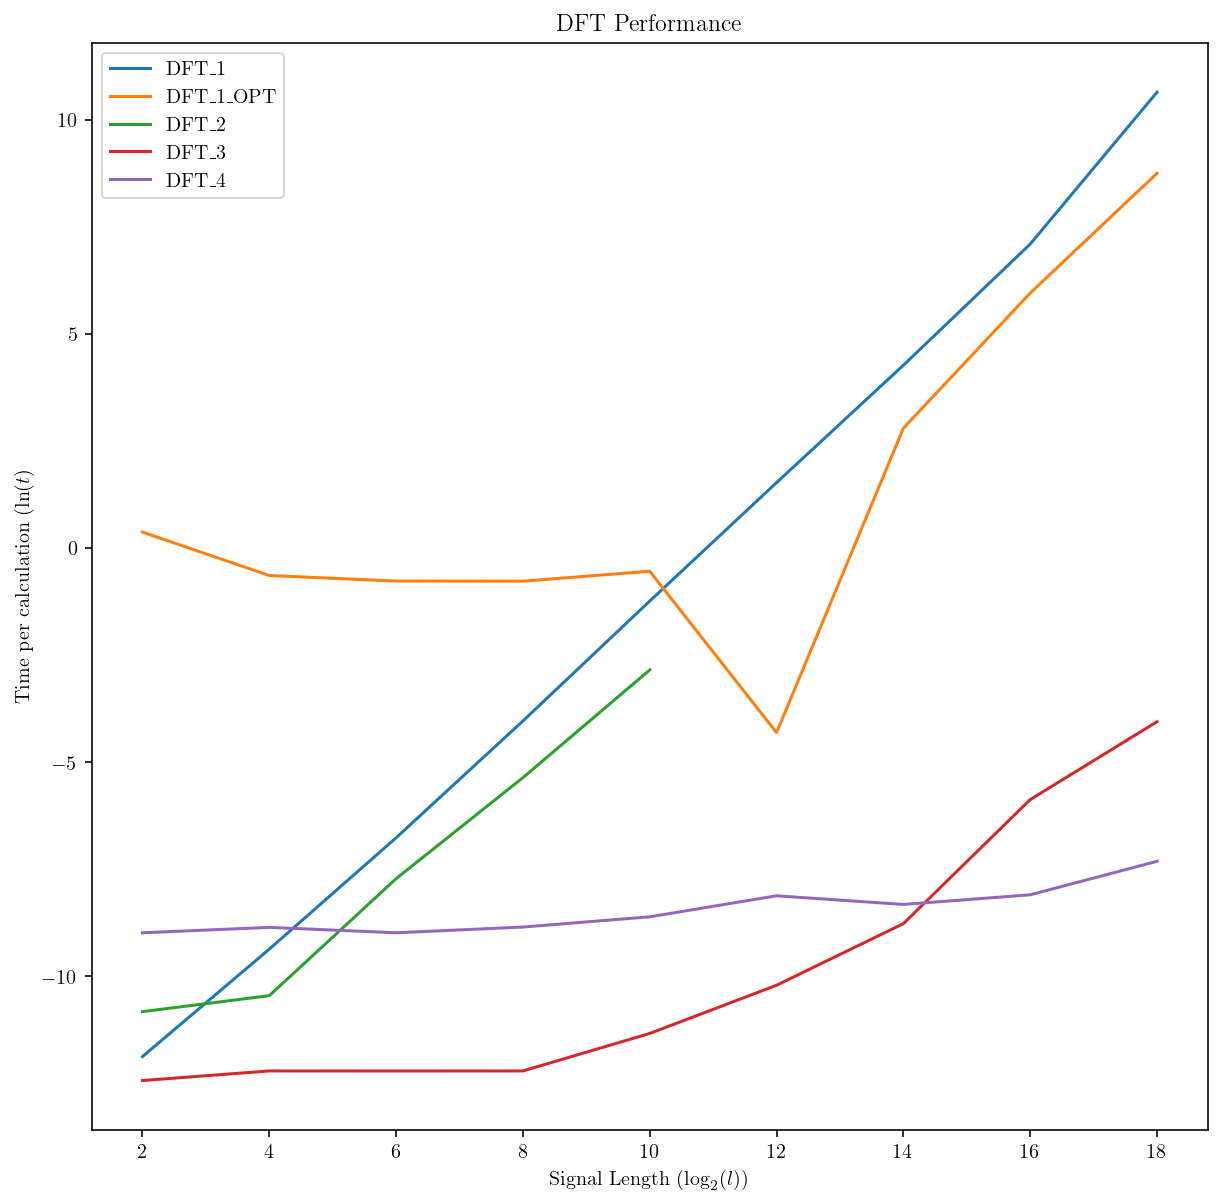

In [44]:
# Visualize the results
data_parsed = {}
for row_id, row in data.iterrows():
    if row["Algorithm"] not in data_parsed:
        data_parsed[row["Algorithm"]] = {}
    data_parsed[row["Algorithm"]][row["Length"]] = row["Time / Round"]

# Plot the results for each algorithm in one plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(10, 10))
for algorithm in data_parsed:
    plt.plot(
        [np.log2(int(k)) for k in data_parsed[algorithm].keys()],
        [(lambda v: np.log(float(v)) if v != "#VALUE!" else None)(v) for v in data_parsed[algorithm].values()],
        label=algorithm
    )
plt.title("DFT Performance")
plt.legend()
plt.xlabel(r"Signal Length ($\log_2(l)$)")
plt.ylabel(r"Time per calculation ($\ln(t)$")

The above plot is interesting to analyze.

`DFT_1` uses the `for` loop to calculate DFT, which has time complexity of $\mathcal{O}(N^2)$. With multiprocessing enabled, the time used reduced significantly when the input size gets large, but it's still painful to use.

`DFT_2` uses matrix manipulation, which also has time complexity of $\mathcal{O}(N^2)$. Consequently, the operation is not fundamentally more optimal than `DFT_1`. Meanwhile, it is memory-intensive, which makes it impossible to work for upscaled inputs. (More RAM required.)

`DFT_3` uses the built-in `NumPy` implementation. It is incredibly fast while being memory-efficient. This is more likely due to its `C`-like nature: in fact we are calling native `C++` functions. From the diagram we can estimate that the time complexity $\approx \mathcal{O}(N)$.

`DFT_4` uses `CuPy`, or `CuFFT` to accelerate the DFT. From the data we acquire, it has great potential and I have yet to fully utilize it. For large-scale inputs, it can be expected to be faster than `DFT_3`, and easily top the other algorithms.

## Special Thanks

During the process of completing the project, I received help from Prof. Yuye Ling. Thanks for his patience and support.

## License

The above code are under MIT License.